# Data Disaggregation

**Disaggregation** means describing or plotting data separately for different categories of individuals.

As we saw in the first lecture of the series, data in a single dataset can arise from different causal processes, for example:
* The distribution of age at death in 1840 includes a set of deaths caused by infant/child mortality, and a set caused by old age
* The distribution of reaction times in a psychological experiment may include a mixture of 'true' responses, false starts, and missed trials

*Disaggregating* data so that we are reporting statistics separately for these different groups is an important part of describing and analyzing data. For example:
* We would like to report the mean reaction time for each condition of our psychological experiment based on 'true' responses, not including missed trials, which contribute a lot of noise to our estimate of the mean.


Disaggregation becomes even more important when we think about making predictions based on data. For example:
* If a patient presents with chest pain, is it more likely to be indigestion or a heart attack? The answer to this question partly depends on the age of the patient (heart attacks are much less likely in young patients), BUT that is different again for men and women.


#### Equality

If a dataset includes a majority and minority group (for example, if the dataset consistes of more men than women, or more white people than black people), then failure to disaggregate data results in findings being biased towards the majority group

* For example, shockingly, <a href="https://www.theguardian.com/society/2021/nov/11/black-women-uk-maternal-mortality-rates">black women are four times more likely to die in childbirth</a> than white women in the UK, a statistic that was long un-remarked because data on maternal outcomes were not routinely disaggregated by race

    
#### Disaggregation skills
    
Working out  which categories of data should be presented in disaggretgated form is a skill that you will learn through practice. Too little disaggregation can obscure important group differences or retains noise that could be removed; but too much disaggregation can result in an ocean of graphs and statistics that makes it hard to see the big picture.

In this section we will look at disaggregation in the context of the heart attack dataset.    


**Here is a video about disaggregating data:**


In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/xmsm_wQmRI4?si=B6f8LTSjp3UifvNG" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

### Set up Python Libraries

As usual you will need to run this code block to import the relevant Python libraries

In [2]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Import a dataset to work with

Let's continue with the NYC heart attack dataset:

In [3]:
hospital=pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/heartAttack.csv')
display(hospital)

,CHARGES,LOS,AGE,SEX,DRG,DIED
0,4752.00,10,79.0,F,122.0,0.0
1,3941.00,6,34.0,F,122.0,0.0
2,3657.00,5,76.0,F,122.0,0.0
3,1481.00,2,80.0,F,122.0,0.0
4,1681.00,1,55.0,M,122.0,0.0
...,...,...,...,...,...,...
12839,22603.57,14,79.0,F,121.0,0.0
12840,NaN,7,91.0,F,121.0,0.0
12841,14359.14,9,79.0,F,121.0,0.0
12842,12986.00,5,70.0,M,121.0,0.0


#### Clean the data

We have reloaded the dataframe from the .csv file, so we need to re-implement the data cleaning steps we already decided were necessary:

In [4]:
hospital.replace(9999, np.nan, inplace=True)
hospital.AGE.replace(774, np.nan, inplace=True )
hospital.describe() # check it worked

/var/folders/t1/vmhsw3716dxdjsw_9lqnpv7h0000gn/T/ipykernel_48484/1115780473.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hospital.AGE.replace(774, np.nan, inplace=True )


,CHARGES,LOS,AGE,DRG,DIED
count,12145.000000,12843.000000,12840.000000,12841.000000,12841.000000
mean,9879.087615,7.567858,66.288162,121.690523,0.109805
std,6558.399650,5.114357,13.654237,0.658289,0.312658
min,3.000000,0.000000,20.000000,121.000000,0.000000
25%,5422.200000,4.000000,57.000000,121.000000,0.000000
50%,8445.000000,7.000000,67.000000,122.000000,0.000000
75%,12569.040000,10.000000,77.000000,122.000000,0.000000
max,47910.120000,38.000000,103.000000,123.000000,1.000000


## Age vs Sex

Is the age distribution of heart attack patients the same regardless of sex?

Let's find out by plotting the age distribution separately for men and women:

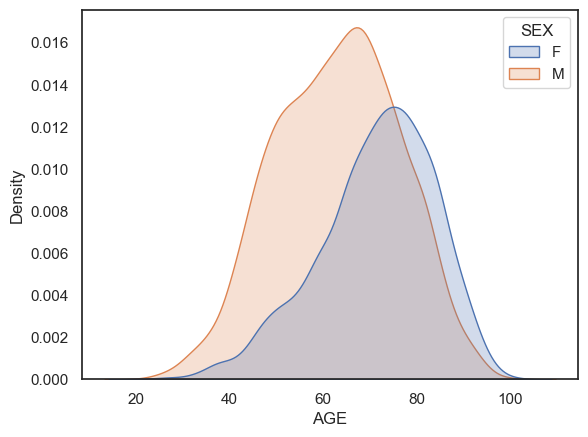

In [5]:
sns.kdeplot(data=hospital, x='AGE', hue='SEX', fill=True) 
plt.show()

**Note-**
* More men had heart attacks than women
* The female patients tend to be older.

**Think**

A 40 year old patient presents with chest pain. It could be a heart attack or it could be indigestion. The doctor needs to decide the likely cause. Does it matter whether the patient is a man or a woman?

### Length of stay

Let's plot the distribution of Length of Stay in hospital:

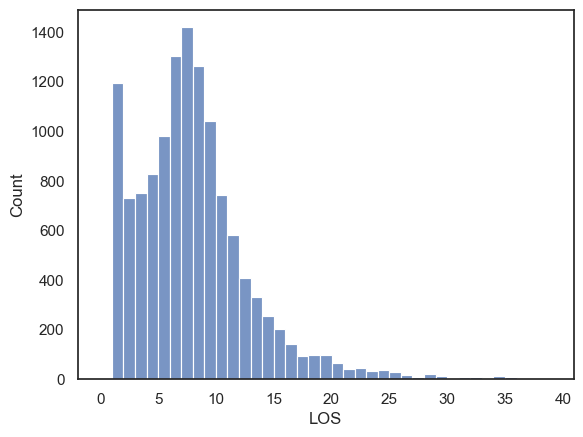

In [6]:
sns.histplot(data=hospital, x='LOS', bins=range(0,40))
plt.show()

**Note-**

There is something unusual here - the dataset is bimodal, with a large number of people staying just one day in hospital.

Often a bimodal distribution is a hint that data the data distribution is a mixture of data arising from two causes. In other words, we suspect the length of stay data could be meaningfully disaggregated.

If we disaggregate these by the categorical variable <tt>DIED</tt>, we can get a clearer picture what happened:


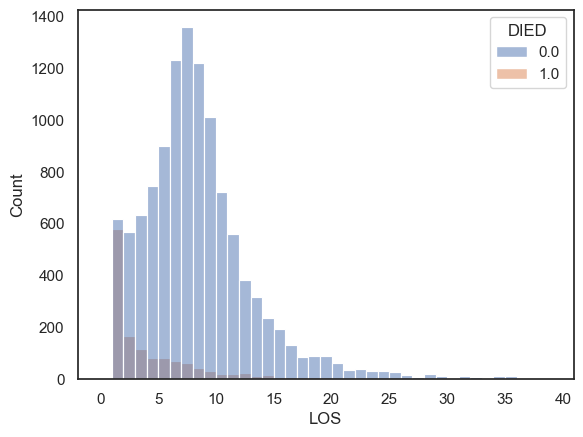

In [7]:
sns.histplot(data=hospital, x='LOS', hue='DIED', bins=range(0,40))
plt.show()

**Note-**

People who sadly died from their heart attack tended to have short stays in hosiptal, with many dying on the same day they were brought to hospital.

For those who eventually survived, it was more typical to stay in hospital for 7-10 days.

## Mortality by sex

At first glance, female patients are much more likely to die than males:

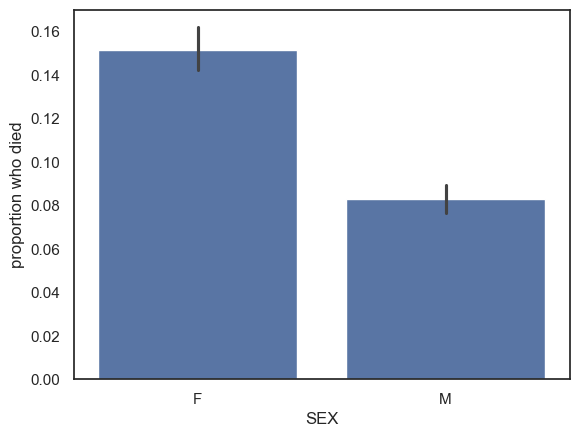

In [8]:
sns.barplot(data=hospital, y='DIED', x='SEX')
plt.ylabel('proportion who died')
plt.show()

Is this due to difference in severity of heart attacks by sex, or perhaps differences int he effectiveness of treatment?

Probably not. We noticed earlier that the female patients were older than the males, and it is reasonable to wonder whether younger patients are more likely to survive.

It turns out this is true, younger patients are more likely to survive. We can see this clearly by plotting the proportion who died at each age

* This is a plot of mortality **conditional** upon age
    * If you are interested you can have a look at the syntax to produce this graph, which is actually a form of KDE plot
    * remember that is you google `sns.kdeplot()` you will find the manual page for KDE plot which explains this form
    * you won't be required to reproduce this type of plot

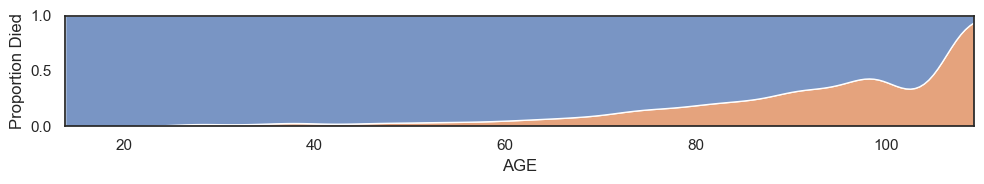

In [9]:
plt.figure(figsize=(10,2))
plt.ylabel('Proportion Died')
sns.kdeplot(data=hospital, x='AGE', hue='DIED', multiple='fill', legend=False)

plt.tight_layout()
plt.show()

If we plot mortality conditional upon age disaggregated by men and women, we can see that *across all ages* men are actually more likely to die than women; the higher overall mortality for women is explained by the presence of more older women in the sample (which in turn probably reflects the fact that women have longer life expectany than men).

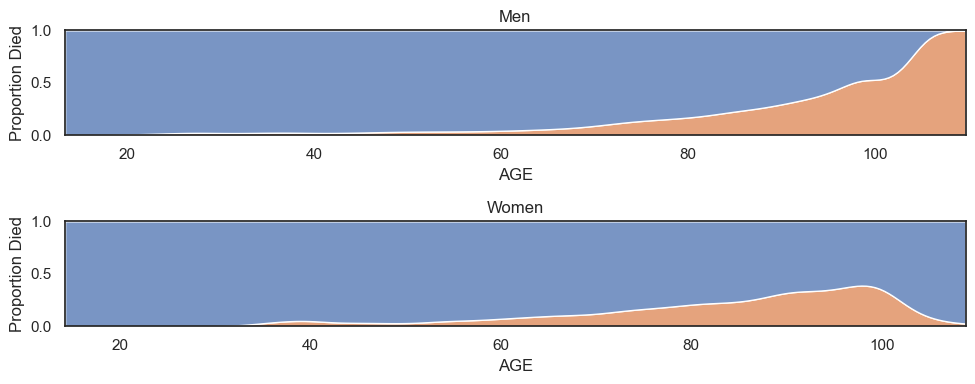

In [10]:
plt.figure(figsize=(10,4))

plt.subplot(2,1,1)
plt.title('Men')
plt.ylabel('Proportion Died')
sns.kdeplot(data=hospital.query('SEX == "M"'), x='AGE', hue='DIED', multiple='fill', legend=False)

plt.subplot(2,1,2)
plt.title('Women')
plt.ylabel('Proportion Died')
sns.kdeplot(data=hospital.query('SEX == "F"'), x='AGE', hue='DIED', multiple='fill', legend=False)

plt.tight_layout()
plt.show()

### Conclusion

You can learn a lot by disaggregating data!

The process of breaking data down to find evidence of different underlying distributions and relationships between variables is at the core of what a good data scientist, or indeed a research scientist, does.
